This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** October 2024
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FREE-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and the free-boundary problem CASE, the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

READ INPUT FILES...
     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...Done!
     -> READ EQUILI DATA FILE...Done!
Done!
INITIALIZATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE VACUUM VESSEL FIRST WALL...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
     -> COMPUTE INITIAL GUESS...
         -> INITIALISE PSI ARRAYS...Done!
         -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
         -> COMPUTE INITIAL VACUUM VESSEL FIRST WALL VALUES PSI_B...Total plasma current computed =  -49403313.555045575
Total plasma current normalization factor =  0.30362335885197006
Normalised total plasma current =  -15000000.0
Done!
         -> ASSIGN INITIAL BOUNDARY VALUES...Done!
     Done!
Done!


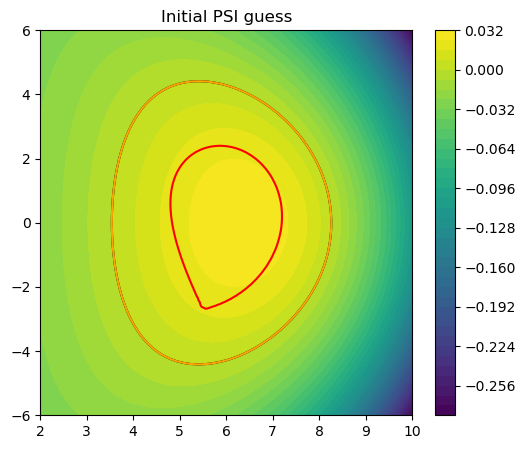

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.06829751 0.15500831]  (ELEMENT  3075 ) WITH VALUE PSI_0 =  [15.81201466]
SADDLE POINT AT  [ 4.59528602 -3.48589139]  (ELEMENT  1697 ) WITH VALUE PSI_X =  [-737.86397659]


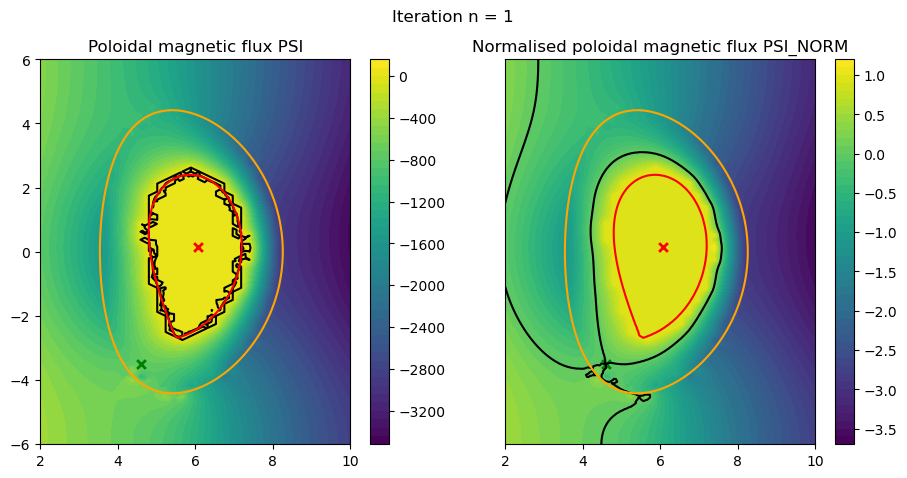

Internal iteration =  1 , PSI_NORM residu =  0.9742456838312286
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [ 5.96039665 -0.06218315]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [1143.84044484]
SADDLE POINT NOT FOUND. TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 4.59528602 -3.48589139]  (ELEMENT  1697 ) WITH VALUE PSI_X =  [-704.22089875]


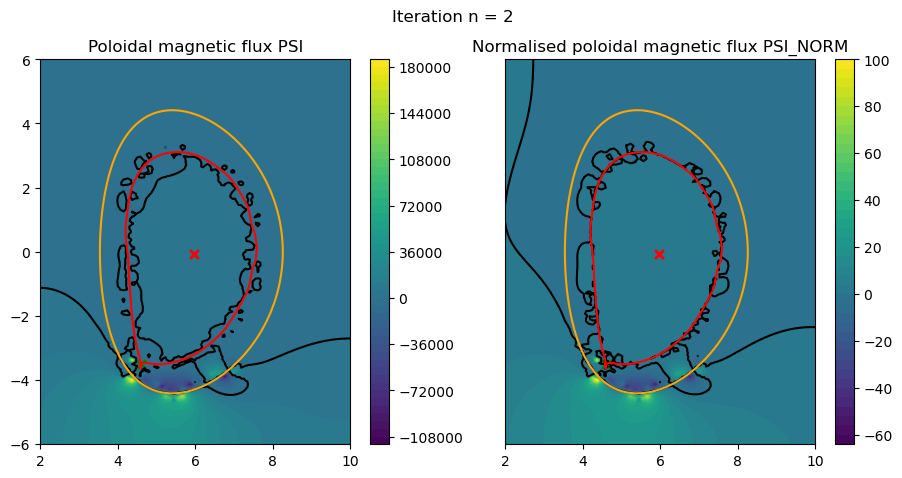

Internal iteration =  2 , PSI_NORM residu =  1.0260064383321934
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [ 5.96760876 -0.13431022]  (ELEMENT  3081 ) WITH VALUE PSI_0 =  [994.34920199]
SADDLE POINT NOT FOUND. TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 4.59528602 -3.48589139]  (ELEMENT  1697 ) WITH VALUE PSI_X =  [-672.10558159]


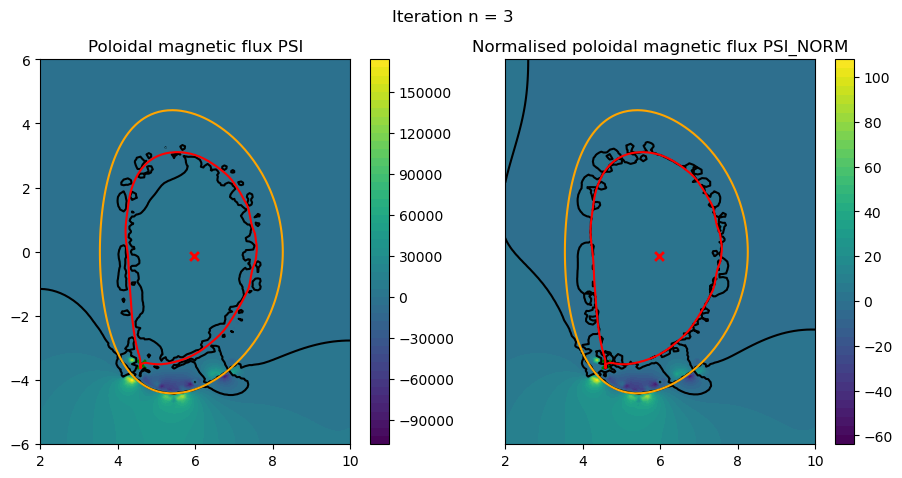

Internal iteration =  3 , PSI_NORM residu =  0.058434127015534555
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...

KeyboardInterrupt: 

In [3]:
import sys
sys.path.append('../')

from src.GradShafranovCutFEM import *

### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TS-CUTFEM-TRI03-COARSE'
#MESH = 'TS-CUTFEM-TRI03-MEDIUM'
#MESH = 'TS-CUTFEM-TRI03-FINE'
#MESH = 'TS-CUTFEM-TRI03-SUPERFINE'
#MESH = 'TS-CUTFEM-TRI03-MEGAFINE'
###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TS-CUTFEM-TRI06-COARSE'
#MESH = 'TS-CUTFEM-TRI06-MEDIUM'
MESH = 'TS-CUTFEM-TRI06-FINE'
#MESH = 'TS-CUTFEM-TRI06-SUPERFINE'
#MESH = 'TS-CUTFEM-TRI06-MEGAFINE'
#MESH = 'TS-CUTFEM-TRI06-ULTRAFINE'
###### CUBIC TRIANGULAR ELEMENT MESH
#MESH = 'TS-CUTFEM-TRI10-COARSE'
#MESH = 'TS-CUTFEM-TRI10-MEDIUM'
#MESH = 'TS-CUTFEM-TRI10-FINE'
#MESH = 'TS-CUTFEM-TRI10-SUPERFINE'
#MESH = 'TS-CUTFEM-TRI10-MEGAFINE'

###### LINEAR QUADRILATERAL ELEMENT MESH
#MESH = 'TS-CUTFEM-QUA04-COARSE'
#MESH = 'TS-CUTFEM-QUA04-MEDIUM'
#MESH = 'TS-CUTFEM-QUA04-FINE'
###### QUADRATIC QUADRILATERAL ELEMENT MESH
#MESH = 'TS-CUTFEM-QUA09-COARSE'
#MESH = 'TS-CUTFEM-QUA09-MEDIUM'
#MESH = 'TS-CUTFEM-QUA09-FINE'

### SELECT SOLUTION CASE FILE:
#CASE = 'TS-FREE-F4E-LINEAR'          # FREE PLASMA BOUNDARY WITH F4E PLASMA REGION GEOMETRY AND LINEAR PLASMA CURRENT
#CASE = 'TS-FREE-F4E-NONLINEAR'       # FREE PLASMA BOUNDARY WITH F4E PLASMA REGION GEOMETRY AND NONLINEAR PLASMA CURRENT MODEL
#CASE = 'TS-FREE-F4E-PROFILES'        # FREE PLASMA BOUNDARY WITH F4E PLASMA REGION GEOMETRY AND PLASMA CURRENT MODEL BASED ON PROFILES FOR PRESSURE AND TOROIDAL FIELD

CASE = 'TS-FREE-F4E-PROFILES-1W'     # FREE PLASMA BOUNDARY WITH F4E PLASMA REGION GEOMETRY, PLASMA CURRENT MODEL BASED ON PROFILES FOR PRESSURE AND TOROIDAL FIELD AND FIRST WALL VACUUM VESSEL GEOMETRY  

##############################################################

## CREATE GRAD-SHAFRANOV PROBLEM 
Problem = GradShafranovCutFEM(MESH,CASE)
## DECLARE OUTPUT SWITCHS:
##### OUTPUT PLOTS IN RUNTIME
Problem.plotElemsClassi_output = False        # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Problem.plotPSI_output = True                 # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Problem.PARAMS_output = True                  # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Problem.PSI_output = True                     # OUTPUT SWITCH FOR PSI FIELD VALUES OBTAINED BY SOLVING THE CutFEM SYSTEM
Problem.PSIcrit_output = True                 # OUTPUT SWITCH FOR CRITICAL PSI VALUES
Problem.PSI_NORM_output = True                # OUTPUT SWITCH FOR THE PSI_NORM FIELD VALUES (AFTER NORMALISATION OF PSI FIELD)
Problem.PSI_B_output = True                   # OUTPUT SWITCH FOR PSI_B BOUNDARY VALUES
Problem.RESIDU_output = True                  # OUTPUT SWITCH FOR RESIDU FOR EACH ITERATION
Problem.ElementsClassi_output = True          # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Problem.PlasmaLevSetVals_output = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Problem.VacVessLevSetVals_output = True       # OUTPUT SWITCH FOR VACUUM VESSEL BOUNDARY LEVEL-SET FIELD VALUES
Problem.L2error_output = True                 # OUTPUT SWITCH FOR ERROR FIELD AND THE L2 ERROR NORM FOR THE CONVERGED SOLUTION 
Problem.ELMAT_output = False                  # OUTPUT SWITCH FOR ELEMENTAL MATRICES

## COMPUTE PLASMA EQUILIBRIUM
Problem.EQUILI()